# Database Management
# Case Study: Analysis of Online Learning Customers' Behaviors

Ling-Chieh Kung <br>
Department of Information Management <br>
National Taiwan University

## Preparation

In [ ]:
# Install DuckDB if you haven't done so
!pip install duckdb
!pip install psycopg2

In [ ]:
import numpy as np
import pandas as pd
import duckdb
import psycopg2
import matplotlib.pyplot as plt

In [3]:
with open('db_password.txt', 'r') as file:
    db_password = file.read().strip()

psql_conn = psycopg2.connect("dbname = 'OnlineLearning2024' user = 'postgres' host = 'localhost' password = " + db_password)

table_names = ['Subscriptions', 'StateChanges', 'UserMissions', 'Answers']
con = duckdb.connect()

for table_name in table_names:
    query_str = "SELECT * FROM " + table_name
    df = pd.read_sql_query(query_str, psql_conn)
    con.register(table_name, df)

psql_conn.close()

C:\Users\lckung\AppData\Local\Temp\ipykernel_18400\3199519299.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_str, psql_conn)
C:\Users\lckung\AppData\Local\Temp\ipykernel_18400\3199519299.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_str, psql_conn)
C:\Users\lckung\AppData\Local\Temp\ipykernel_18400\3199519299.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_str, psql_conn)
C:\Users\lckung\AppData\Local\Temp\ipykernel_1840

In [4]:
# function that sees SQL command AS input and output table from database
def query(query):
    result = con.execute(query).fetchall()
    column_names = [desc[0] for desc in con.description]
    return column_names, result

## Q1

計算每個月的新增訂閱學員數（每當有一個學員開始訂閱，在 Subscriptions 裡面就會新增一筆資料），並且繪製折線圖呈現。有沒有哪些月份的業績表現比較好？

In [5]:
columns, data = query('''
          SELECT 
            EXTRACT(YEAR FROM CreatedAt) AS year, 
            EXTRACT(MONTH FROM CreatedAt) AS month, 
            COUNT(*)
          FROM subscriptions
          GROUP BY year, month
          ''')

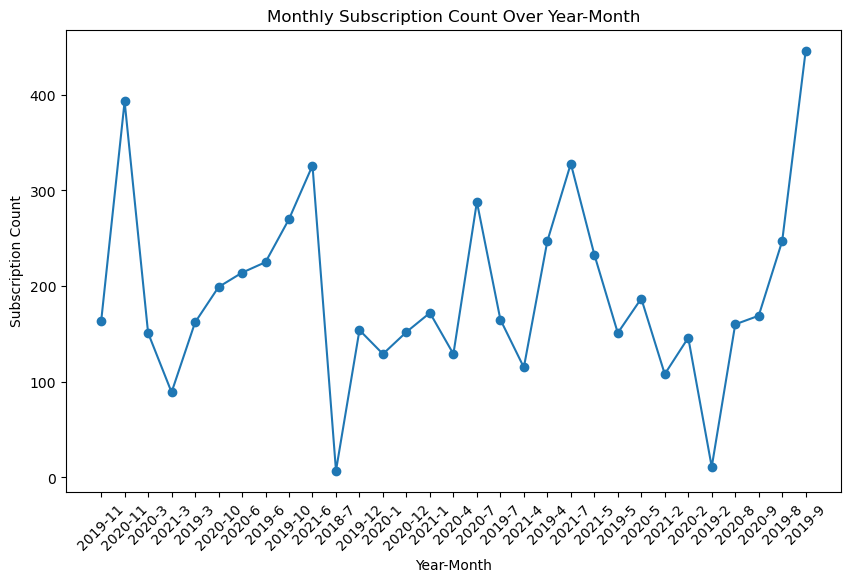

In [6]:
years_months = [(f"{year}-{month}", count) for year, month, count in data]
labels, counts = zip(*years_months)

plt.figure(figsize=(10, 6))
plt.plot(labels, counts, marker='o', linestyle='-', label='Counts')
plt.xlabel('Year-Month')
plt.ylabel('Subscription Count')
plt.title('Monthly Subscription Count Over Year-Month')
plt.xticks(rotation=45)
plt.show()